# Importaciones

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

PRESA01 = pd.read_csv("datos/SA_DATA.csv")
PREDHS = pd.read_csv("datos/DHS_DATA.csv")


# Limpieza de los Datos 🧹

In [17]:
INDEX = PRESA01.drop(0)
SA01 = INDEX.drop(columns=["GHO (URL)", "DIMENSION (TYPE)",  "DIMENSION (CODE)", "DIMENSION (NAME)", "Low", "High"])
SA01.head(20)
PREDHS.drop(index=0, inplace=True)
DHS = PREDHS.drop(columns=["RegionId", "LevelRank", "SurveyId", "IndicatorId", "IndicatorOrder"])


# Análisis de Datos 📊

## Vista General 👁‍🗨

### Camas por Año 🛏

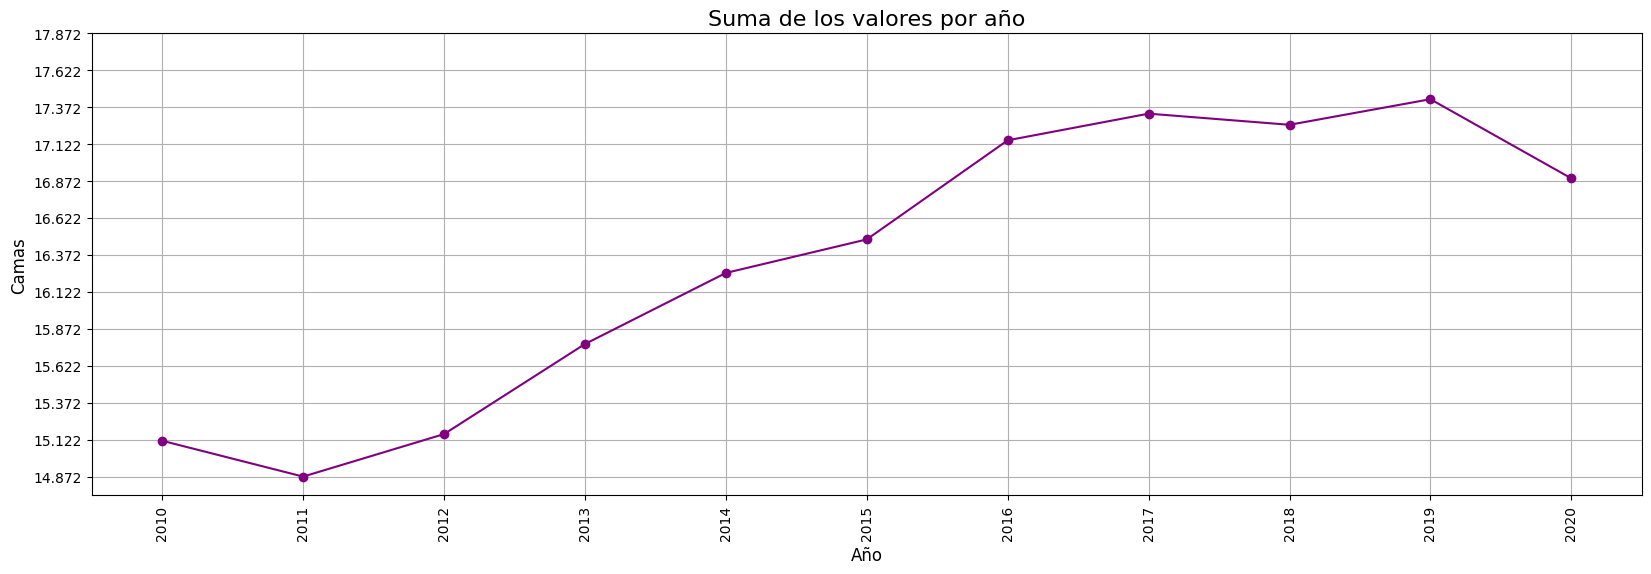

In [18]:
año_camas_sum = SA01.groupby("STARTYEAR")["Numeric"].sum()
año_camas_sum = pd.to_numeric(año_camas_sum, errors='coerce')


plt.figure(figsize=(20, 6))
plt.plot(año_camas_sum.index, año_camas_sum.values, marker='o', linestyle='-', color='purple')
plt.xticks(rotation=90)
plt.title('Suma de los valores por año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Camas', fontsize=12)
plt.grid(True)
plt.yticks(np.arange(min(año_camas_sum.values), max(año_camas_sum.values) + 0.5, 0.25))
plt.show() 

### Tasa de Fertilidad 🤱🏽

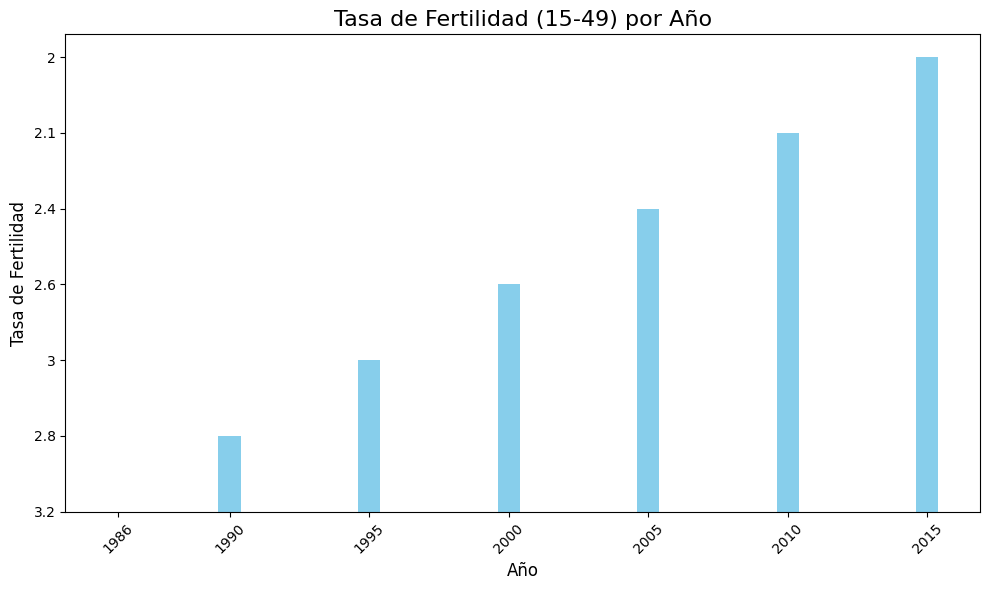

In [19]:
fertilidad = DHS[DHS["Indicator"] == "Total fertility rate 15-49"]
fertilidad_anio = fertilidad.groupby("SurveyYear")["Value"].apply(list).reset_index()
fertilidad_anio["SurveyYear"] = pd.to_numeric(fertilidad_anio["SurveyYear"], errors='coerce')
fertilidad_anio.head()
fertilidad_anio["Value"] = fertilidad_anio["Value"].apply(lambda x: x[0] if isinstance(x, list) else x)
fertilidad_anio.head()

plt.figure(figsize=(10,6))
plt.bar(fertilidad_anio["SurveyYear"], fertilidad_anio["Value"], color='skyblue')
plt.title("Tasa de Fertilidad (15-49) por Año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Tasa de Fertilidad", fontsize=12)
plt.xticks(fertilidad_anio["SurveyYear"], rotation=45)
plt.tight_layout()
plt.show()



## 🏥 Análisis de la Evolución de las Enfermedades Crónicas en Colombia